In [40]:
%load_ext autoreload
%autoreload 2

import cstrees.cstree as ct
import numpy as np
import networkx as nx
import random
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[0, [0, 1], [0, 1]]; probs: [0.32467279 0.67532721]


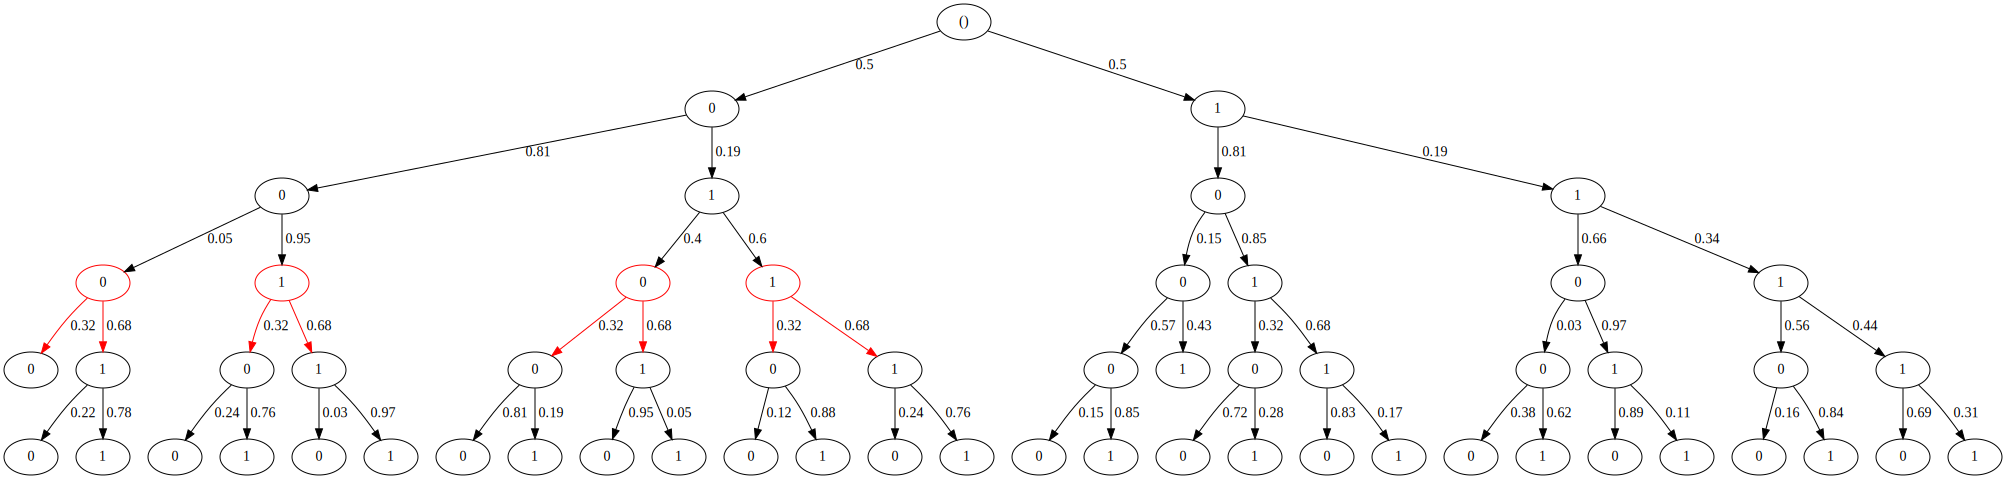

In [41]:
import numpy as np
np.random.seed(3)
p = 5
co = ct.CausalOrder(range(1, p+1))
tree = ct.CStree(co)
cards = [2] * p
tree.set_cardinalities([None] + cards)

stage = ct.sample_random_stage(cards, 3)
stage.set_random_params(cards)

stage.color = "red"
print(stage)

tree.add_stages({3:[stage]})
x = tree.sample(100)
#print(x)
a = tree.plot()
a

In [42]:
tree.to_df()

,1,2,3,4,5
0,2,2,2,2,2
0,0,*,*,-,-


[[1 0 1 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [0 0 1 0 1]
 [0 0 1 1 1]
 [0 0 1 0 1]
 [1 0 0 0 1]
 [0 0 1 1 1]
 [1 0 1 1 0]]


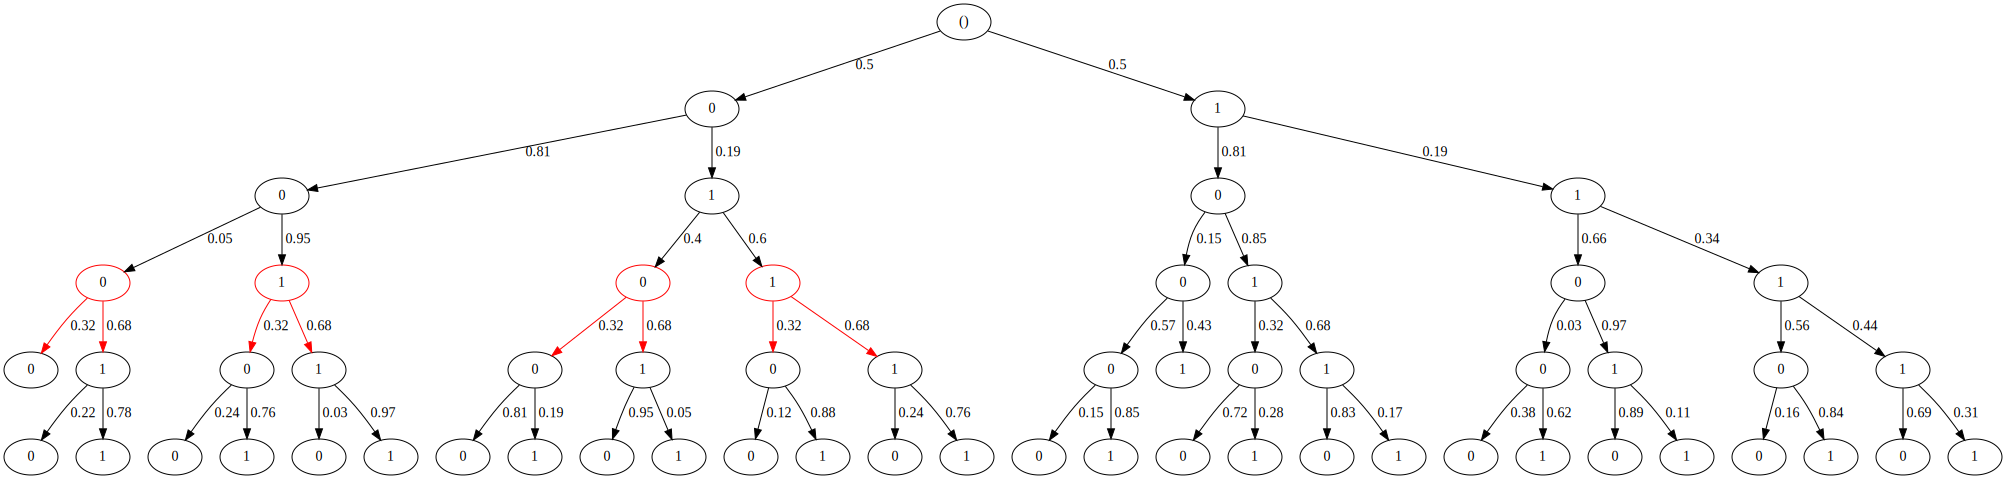

In [43]:
x = tree.sample(10)
print(x)
a = tree.plot()
a

[0, [0, 1], 1]; probs: [0.01474321 0.98525679]
[0, [0, 1], 0]; probs: [0.82656561 0.17343439]
[1, [0, 1], [0, 1]]; probs: [0.38330143 0.61669857]
[0, 0, [0, 1], 0]; probs: [0.65532527 0.34467473]
[[0, 1], 1, [0, 1], [0, 1]]; probs: [0.17159762 0.82840238]
5


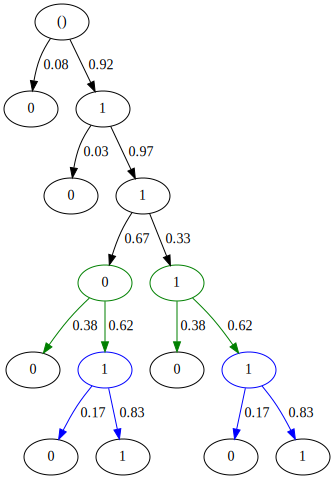

In [44]:
seed=9
np.random.seed(seed)#9
random.seed(seed)

p = 5
t = ct.sample_cstree(p)

np.random.seed(seed)#9
random.seed(seed)

t.set_random_stage_parameters()

ns = 0
for l, sl in t.stages.items():
    for s in sl:
        ns+=1
        print(s)
print(ns)
t.sample(5)

df = t.to_df()
df.to_csv("test.csv", index=False)
t.plot()

[0, [0, 1], 1]; probs: [0.01474321 0.98525679]
[0, [0, 1], 0]; probs: [0.82656561 0.17343439]
[1, [0, 1], [0, 1]]; probs: [0.38330143 0.61669857]
[0, 0, [0, 1], 0]; probs: [0.65532527 0.34467473]
[[0, 1], 1, [0, 1], [0, 1]]; probs: [0.17159762 0.82840238]


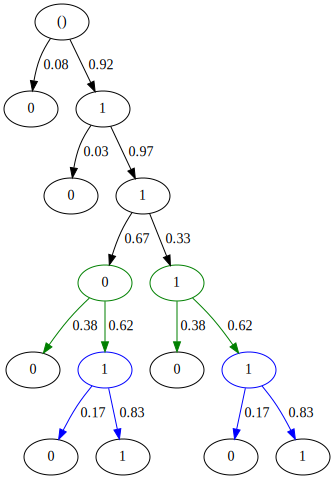

In [45]:
df = pd.read_csv("test.csv", header=[0,1])

tt = ct.df_to_cstree(df)
np.random.seed(seed)#9
random.seed(seed)

tt.set_random_stage_parameters()
for l, sl in tt.stages.items():
    for s in sl:
        ns+=1
        print(s)
tt.sample(5)
tt.plot()

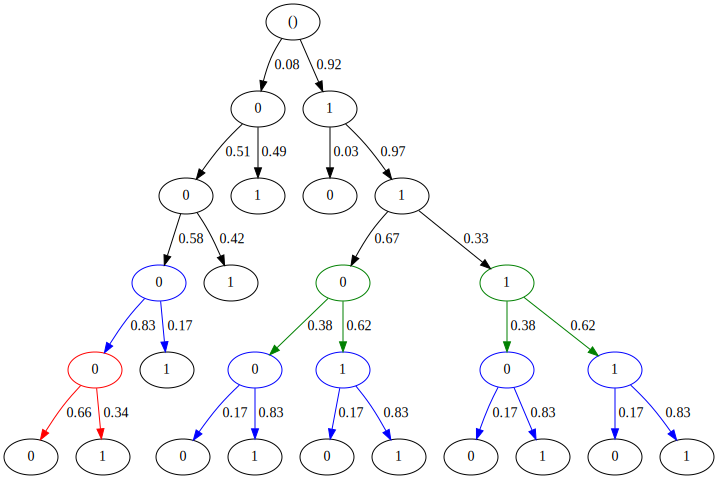

In [46]:
t.sample(5)
a = t.plot()
a


In [47]:
csis = t.csi_relations()
for key, val in csis.items():
    print("Context: {}".format(key))
    for v in val:
        print()
        print(v.ci)
        print("From decomposition:")
        for x in ct.decomposition(v.ci):
            print(str(x))
        print("From weak union:")
        for x in ct.weak_union(v.ci):
            print(str(x))
    print("")

Context: X1=0, X3=1

X2 ⊥ X4
From decomposition:
From weak union:

Context: X1=0, X3=0

X2 ⊥ X4
From decomposition:
From weak union:

Context: X1=1

X2, X3 ⊥ X4
From decomposition:
X2 ⊥ X4
X3 ⊥ X4
From weak union:
X3 ⊥ X4 | X2
X2 ⊥ X4 | X3

Context: X1=0, X2=0, X4=0

X3 ⊥ X5
From decomposition:
From weak union:

Context: X2=1

X1, X3, X4 ⊥ X5
From decomposition:
X1 ⊥ X5
X3 ⊥ X5
X4 ⊥ X5
From weak union:
X3, X4 ⊥ X5 | X1
X1, X4 ⊥ X5 | X3
X1, X3 ⊥ X5 | X4
X4 ⊥ X5 | X1, X3
X3 ⊥ X5 | X1, X4
X1 ⊥ X5 | X3, X4



In [48]:
co = t.co
adjmats = ct.csi_relations_to_dags(csis, co)
graphs=[(key,graph) for key, graph in adjmats.items()]

Context: X1=0, X3=1


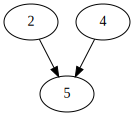

In [49]:
print("Context: {}".format(graphs[0][0]))

ct.plot(graphs[0][1])


Context: X1=0, X3=0


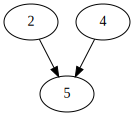

In [50]:
print("Context: {}".format(graphs[1][0]))
ct.plot(graphs[1][1])

Context: X1=1


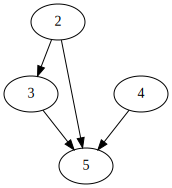

In [51]:
print("Context: {}".format(graphs[2][0]))


ct.plot(graphs[2][1])

In [52]:
t.sample(10)

array([[1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1]])